##### Select only the data from february

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the CSV file
file_path = r'MetroPT3(AirCompressor).csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Convert the first column to datetime
data.iloc[:, 1] = pd.to_datetime(data.iloc[:, 1], format='%Y-%m-%d %H:%M:%S')

testdf = data[:]#[445298:1295984] #April to July
testdf["timestamp"] = pd.to_datetime(testdf["timestamp"], format="%d/%m/%Y %H:%M:%S")

testdf.head(5)

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [2]:
'''# Filter the DataFrame for the date 2020-04-01
filtered_df = testdf[(testdf['timestamp'] >= '2020-07-17') & (testdf['timestamp'] < '2020-07-19')]

# Plot the 'TP2' column for the filtered date
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['timestamp'], filtered_df['TP3'], marker='.', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('TP2')
plt.title('TP2 for the Day 2020-04-01')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()'''

"# Filter the DataFrame for the date 2020-04-01\nfiltered_df = testdf[(testdf['timestamp'] >= '2020-07-17') & (testdf['timestamp'] < '2020-07-19')]\n\n# Plot the 'TP2' column for the filtered date\nplt.figure(figsize=(12, 6))\nplt.plot(filtered_df['timestamp'], filtered_df['TP3'], marker='.', linestyle='-')\nplt.xlabel('Timestamp')\nplt.ylabel('TP2')\nplt.title('TP2 for the Day 2020-04-01')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.show()"

#### Determine the minima and maxima

In [3]:
# Determining the maxima and minima
n = 15  # Number of neighbors to consider on each side

# Extract the second column (TP3)
tp3 = testdf.iloc[:, 3].values  # Second column as a NumPy array

# Initialize lists to store indices of maxima and minima
maxima_indices = []
minima_indices = []

# Iterate through the data points
for i in range(n, len(tp3) - n):
    # Get the neighborhood
    neighborhood = tp3[i - n:i + n + 1]
    
    # Check for maximum
    if tp3[i] == max(neighborhood):
        # Ensure the current index is the most recent occurrence of the maximum
        if i == np.max(np.where(neighborhood == tp3[i])[0]) + i - n:
            maxima_indices.append(i)
    
    # Check for minimum
    if tp3[i] == min(neighborhood):
        # Ensure the current index is the most recent occurrence of the minimum
        if i == np.max(np.where(neighborhood == tp3[i])[0]) + i - n:
            minima_indices.append(i)

# Output results
print(f"Maxima indices: {maxima_indices}")
print(f"Minima indices: {minima_indices}")
print(len(maxima_indices))
print(len(minima_indices))

'''
export_data = pd.DataFrame({
    'Minima Indices': pd.Series(minima_indices),
    'Maxima Indices': pd.Series(maxima_indices)
})

# Export the DataFrame to a CSV file
export_data.to_csv('maxima_minima_indices.csv', index=False)
'''


Maxima indices: [151, 357, 559, 763, 966, 1166, 1369, 1548, 1726, 1908, 2056, 2252, 2386, 2496, 2687, 2869, 3017, 3225, 3345, 3534, 3746, 3904, 4152, 4382, 4604, 4791, 5005, 5199, 5395, 5527, 5632, 5847, 5927, 6067, 6243, 6403, 6539, 6762, 6908, 7047, 7114, 7147, 7358, 7426, 7635, 7814, 7997, 8157, 8289, 8452, 8585, 8811, 8937, 9100, 9277, 9488, 9583, 9781, 9950, 10104, 10287, 10448, 10666, 10807, 10988, 11100, 11320, 11455, 11622, 11798, 11975, 12135, 12306, 12474, 12681, 12900, 13083, 13257, 13438, 13610, 13784, 13956, 14129, 14302, 14474, 14646, 14820, 14994, 15170, 15340, 15513, 15686, 15860, 16035, 16208, 16383, 16559, 16735, 16922, 17122, 17324, 17527, 17732, 17937, 18106, 18311, 18515, 18722, 18925, 19130, 19334, 19537, 19745, 19949, 20169, 20356, 20633, 20885, 21127, 21367, 21600, 21852, 22103, 22349, 22590, 22843, 23070, 23326, 23577, 23831, 24083, 24339, 24581, 24817, 25079, 25171, 25307, 25523, 25653, 25857, 26015, 26245, 26437, 26612, 26865, 26999, 27267, 27439, 27654, 2780

"\nexport_data = pd.DataFrame({\n    'Minima Indices': pd.Series(minima_indices),\n    'Maxima Indices': pd.Series(maxima_indices)\n})\n\n# Export the DataFrame to a CSV file\nexport_data.to_csv('maxima_minima_indices.csv', index=False)\n"

#### Plotting TP3 against the indices

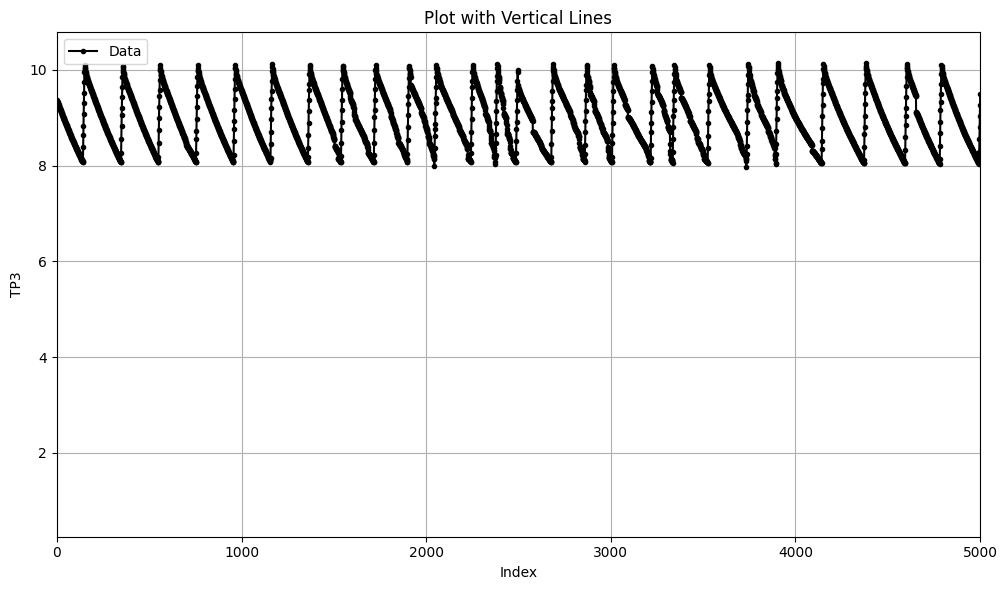

In [4]:
plt.figure(figsize=(10, 6))
# Extract the first and third columns
#x = data.iloc[:400, 0]  # First column (datetime)
aux = 856832-445298
x = range(0, testdf.shape[0])
y = testdf.iloc[:, 3]  # Second column
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')


'''# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=idx, color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=idx, color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")'''

# Add labels, title, and grid
plt.xlabel('Index')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
#tick_spacing = 100  # Adjust this for denser or sparser ticks
#ticks = range(aux, aux + 1000 + 1, tick_spacing)
#plt.xticks(ticks, rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.xlim(0, 5000)


# Add a legend
plt.legend()

# Show the plot
plt.show()

#### Converting the timestamp insto seconds since first measurement (01/02/2020  00:00:00)

In [5]:
# Calculate seconds since the first entry
timestart = testdf["timestamp"].iloc[0]
testdf["timestamp"] = (testdf["timestamp"] - testdf["timestamp"].iloc[0]).dt.total_seconds()
print(timestart)

2020-02-01 00:00:00


c:\Users\JoãoMarquesDias\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


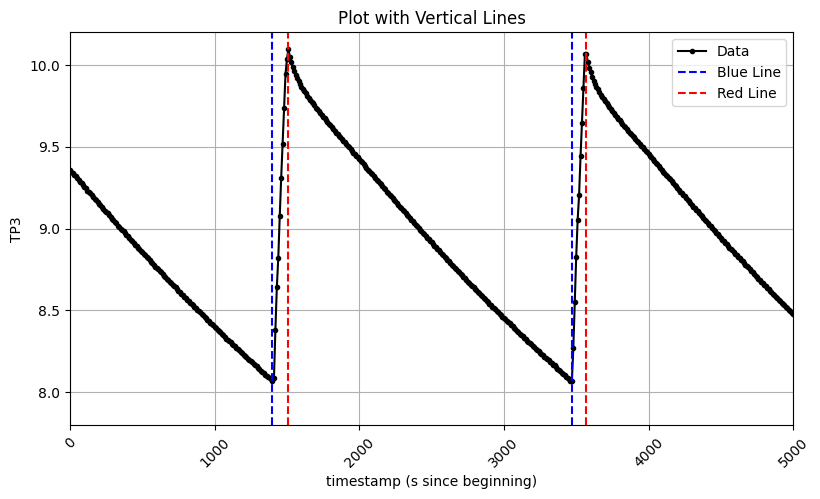

In [6]:
aux=0
x = testdf.iloc[ :, 0] #Timestamp
y = testdf.iloc[:, 3] #TP3
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 0], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,0], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
plt.xlim(0+aux, 5000+aux)
plt.ylim(7.8, 10.2)

# Show the plot
plt.show()

#### Calculating $T_{run}$ and $T_{idle}$ vectors

In [7]:
# Assuming maxima_indices and minima_indices are lists of indices
# Assuming timestamps is a list or array of timestamps corresponding to the indices

def compute_trun_tidle(testdf, maxima_indices, minima_indices):
    # Initialize lists to store Trun and Tidle values
    Trun = []
    trun = []

    Tidle = []
    tidle = []

    # Compute Trun
    for max_idx in maxima_indices:
        # Find the closest minima index with a smaller index value
        valid_minima_indices = [min_idx for min_idx in minima_indices if min_idx < max_idx]
        if valid_minima_indices:
            closest_min_idx = max(valid_minima_indices)
            trun_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Trun.append(trun_value)
            trun.append(testdf.iloc[closest_min_idx, 1])
        
        valid_minima_indices_2 = [min_idx for min_idx in minima_indices if min_idx > max_idx]
        if valid_minima_indices_2:
            closest_min_idx = min(valid_minima_indices_2)
            tidle_value = abs(testdf.iloc[max_idx, 1] - testdf.iloc[closest_min_idx, 1])#.total_seconds()
            Tidle.append(tidle_value)
            tidle.append(testdf.iloc[max_idx, 1])
        

    return Trun, Tidle, trun, tidle

Trun, Tidle, trun, tidle = compute_trun_tidle(testdf, maxima_indices, minima_indices)

print("Trun:", Trun)
print('trun:', trun,'\n')
print("Tidle:", Tidle)
print('tidle:', tidle) 

Trun: [np.float64(109.0), np.float64(99.0), np.float64(99.0), np.float64(99.0), np.float64(100.0), np.float64(100.0), np.float64(99.0), np.float64(99.0), np.float64(99.0), np.float64(100.0), np.float64(119.0), np.float64(100.0), np.float64(109.0), np.float64(99.0), np.float64(99.0), np.float64(99.0), np.float64(109.0), np.float64(100.0), np.float64(99.0), np.float64(89.0), np.float64(119.0), np.float64(109.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(110.0), np.float64(109.0), np.float64(109.0), np.float64(110.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(12929.0), np.float64(30.0), np.float64(139.0), np.float64(109.0), np.float64(89.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(99.0), np.float64(109.0), np.float64(109.0), np.float64(109.0), np.float64(119.0), n

#### Creating coordinates for box centers

In [8]:
Box_centers = np.zeros((min(len(Trun), len(Tidle)), 7))
Trun_fixed = []
Tidle_fixed = []

# Populate the matrix
for i in range(Box_centers.shape[0]):
    Trun_aux = Trun[i]
    Tidle_aux = Tidle[i]
    
    # First two components: Trun_1 * (1/4, 3/4)
    Box_centers[i, 0] = trun[i] + Trun_aux * (1 / 4)
    Box_centers[i, 1] = trun[i] + Trun_aux * (3 / 4)
    


    fractions = [1/10, 3/10, 5/10, 7/10, 9/10]
    valid_tidle_indices = [k for k in range(len(Tidle)) if tidle[k] > trun[i]]
    if valid_tidle_indices:
        k = min(valid_tidle_indices)
        for j, fraction in enumerate(fractions, start=2):
            Box_centers[i, j] = trun[i] + Trun_aux + Tidle[k] * fraction   

    '''   # Remaining five components: Tidle_1 * (1/10, 3/10, 5/10, 7/10, 9/10)
    fractions = [1/10, 3/10, 5/10, 7/10, 9/10]
    for j, fraction in enumerate(fractions, start=2):
        Box_centers[i, j] = trun[i] + Trun_aux +  * fraction'''

#### Plotting graph with box centres

In [9]:
Box_centers[0,:]

array([1415.25, 1469.75, 1691.2 , 2079.6 , 2468.  , 2856.4 , 3244.8 ])

In [10]:
testdf.iloc[minima_indices[-1],2]
minima_indices[-1]

1516860

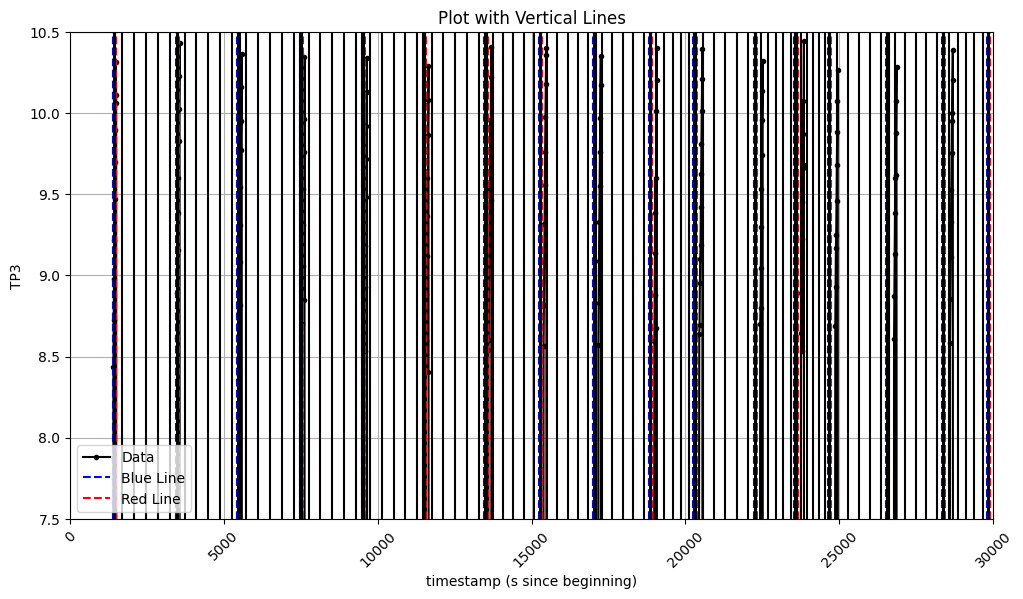

In [11]:
x = testdf.iloc[:, 0]#range(testdf.shape[0]) #Timestamp
y = testdf.iloc[:, 2] #TP3
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[1] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 1], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[1] else "")


# Plot red vertical lines
for i in range(Box_centers.shape[0]):    
    for idx in Box_centers[i, :]:
        plt.axvline(x=idx, color='black', linestyle='-', label='')

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('TP3')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
plt.xlim(0, 30000)
plt.ylim(7.5,10.5)

# Show the plot
plt.show()

In [12]:
testdf.iloc[maxima_indices[-1],0]

np.int64(15168720)

#### Determining $B_n(TP2)$

In [13]:
Box_centers_flattened = Box_centers.flatten().tolist()

Boxes_tp2_flattened = []
Boxes_tp2_flattened.append(float(testdf.iloc[143, 2])) #See first value by eye

Boxes_tp3_flattened = []
Boxes_tp3_flattened.append(float(testdf.iloc[143, 3])) #See first value by eye

Boxes_h1_flattened = []
Boxes_h1_flattened.append(float(testdf.iloc[143, 4])) #See first value by eye

Boxes_dvp_flattened = []
Boxes_dvp_flattened.append(float(testdf.iloc[143, 5])) #See first value by eye

Boxes_res_flattened = []
Boxes_res_flattened.append(float(testdf.iloc[143, 6])) #See first value by eye

Boxes_oil_flattened = []
Boxes_oil_flattened.append(float(testdf.iloc[143, 7])) #See first value by eye

Boxes_mc_flattened = []
Boxes_mc_flattened.append(float(testdf.iloc[143,8])) #See first value by eye


for i in range(1, len(Box_centers_flattened)-1):
    flag_min=1e5
    aux = 0
    for j in testdf[(testdf['timestamp']>=Box_centers_flattened[i-1]) & (testdf['timestamp']<=Box_centers_flattened[i+1])]['timestamp'].to_list():
        if abs(Box_centers_flattened[i] - j) < flag_min:
            flag_min = abs(Box_centers_flattened[i] - j)
            aux = j
    Boxes_tp2_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP2']))
    Boxes_tp3_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP3']))
    Boxes_h1_flattened.append(float(testdf[testdf['timestamp'] == aux]['H1']))
    Boxes_dvp_flattened.append(float(testdf[testdf['timestamp'] == aux]['DV_pressure']))
    Boxes_res_flattened.append(float(testdf[testdf['timestamp'] == aux]['Reservoirs']))
    Boxes_oil_flattened.append(float(testdf[testdf['timestamp'] == aux]['Oil_temperature']))
    Boxes_mc_flattened.append(float(testdf[testdf['timestamp'] == aux]['Motor_current']))


Boxes_tp2_flattened.append(float(testdf.iloc[1295955, 2])) #See last one by eye
Boxes_tp2 = np.reshape(Boxes_tp2_flattened, (Box_centers.shape[0], 7))

Boxes_tp3_flattened.append(float(testdf.iloc[1295955, 3])) #See last one by eye
Boxes_tp3 = np.reshape(Boxes_tp3_flattened, (Box_centers.shape[0], 7))

Boxes_h1_flattened.append(float(testdf.iloc[1295955, 4])) #See last one by eye
Boxes_h1 = np.reshape(Boxes_h1_flattened, (Box_centers.shape[0], 7))

Boxes_dvp_flattened.append(float(testdf.iloc[1295955, 5])) #See last one by eye
Boxes_dvp = np.reshape(Boxes_dvp_flattened, (Box_centers.shape[0], 7))

Boxes_res_flattened.append(float(testdf.iloc[1295955, 6])) #See last one by eye
Boxes_res = np.reshape(Boxes_res_flattened, (Box_centers.shape[0], 7))

Boxes_oil_flattened.append(float(testdf.iloc[1295955, 7])) #See last one by eye
Boxes_oil = np.reshape(Boxes_oil_flattened, (Box_centers.shape[0], 7))

Boxes_mc_flattened.append(float(testdf.iloc[1295955, 8])) #See last one by eye
Boxes_mc = np.reshape(Boxes_mc_flattened, (Box_centers.shape[0], 7))

C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_19080\1558201319.py:32: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_tp2_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP2']))
C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_19080\1558201319.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_tp3_flattened.append(float(testdf[testdf['timestamp'] == aux]['TP3']))
C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_19080\1558201319.py:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Boxes_h1_flattened.append(float(testdf[testdf['timestamp'] == aux]['H1']))
C:\Users\JoãoMarquesDias\AppData\Local\Temp\ipykernel_19080\1558201319.py:35: FutureWarning: Calling f

TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current || COMP,DV_eletric,Towers,MPG,Pressure_switch,Oil_level,Caudal_impulses

In [14]:
Box_centers[0, :]

array([1415.25, 1469.75, 1691.2 , 2079.6 , 2468.  , 2856.4 , 3244.8 ])

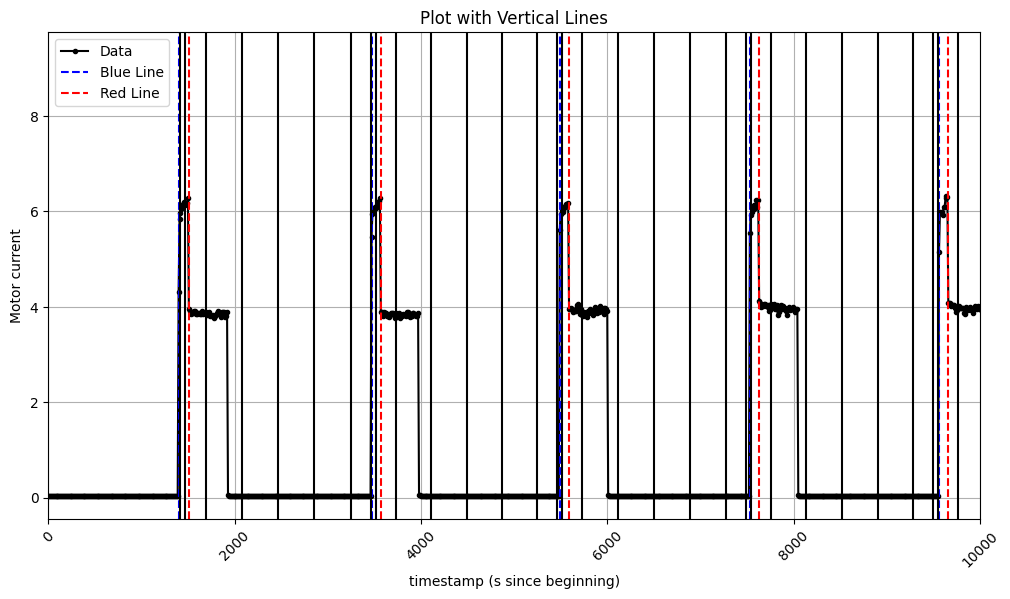

In [15]:
x = testdf.iloc[:, 0] #Timestamp
y = testdf.iloc[:, 8] #TP3
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='-', color='black', label='Data')

# Plot blue vertical lines
for idx in minima_indices[:]:
    plt.axvline(x=testdf.iloc[idx, 0], color='blue', linestyle='--', label='Blue Line' if idx == minima_indices[0] else "")

# Plot red vertical lines
for idx in maxima_indices[:]:
    plt.axvline(x=testdf.iloc[idx,0], color='red', linestyle='--', label='Red Line' if idx == maxima_indices[0] else "")

# Plot red vertical lines
for i in range(Box_centers.shape[0]):    
    for idx in Box_centers[i, :]:
        plt.axvline(x=idx, color='black', linestyle='-', label='')

# Add labels, title, and grid
plt.xlabel('timestamp (s since beginning)')
plt.ylabel('Motor current')
plt.title('Plot with Vertical Lines')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Add a legend
plt.legend()
plt.xlim(0, 10000)

# Show the plot
plt.show()

#### Creating the input vector

In [16]:
Boxes_tp2.shape

(11627, 7)

In [17]:
len(Tidle)

11627

In [18]:
# Reshape Trun and Tidle to be 2-dimensional arrays
Tidle_reshaped = np.array(Tidle).reshape(-1, 1)
Trun_reshaped = np.array(Trun[:-1]).reshape(-1, 1)

# Concatenate the arrays
X_test_analog = pd.DataFrame(np.hstack((Boxes_tp2, Boxes_tp3, Boxes_h1, Boxes_dvp, Boxes_res, Boxes_oil, Boxes_mc, Trun_reshaped, Tidle_reshaped)), 
                             columns=['TP2_1', 'TP2_2', 'TP2_3', 'TP2_4', 'TP2_5' ,'TP2_6', 'TP2_7', 'TP3_1', 'TP3_2', 'TP3_3', 'TP3_4', 'TP3_5' ,'TP3_6', 'TP3_7', 'H1_1', 'H1_2', 'H1_3', 'H1_4', 'H1_5' ,'H1_6', 'H1_7','DVP_1', 'DVP_2', 'DVP_3', 'DVP_4', 'DVP_5' ,'DVP_6', 'DVP_7', 'Res_1', 'Res_2', 'Res_3', 'Res_4', 'Res_5' ,'Res_6', 'Res_7', 'OilT_1', 'OilT_2', 'OilT_3', 'OilT_4', 'OilT_5' ,'OilT_6', 'OilT_7', 'MC_1', 'MC_2', 'MC_3', 'MC_4', 'MC_5', 'MC_6', 'MC_7', 'Trun', 'Tidle'])

In [19]:
# Convert trun values to timestamps
timestamps = [pd.to_datetime(i + timestart.timestamp(), unit='s') for i in trun[:-1]]

# Add the new column to X_test_analog
X_test_analog['timestamp'] = timestamps

# Display the updated DataFrame
pd.set_option('display.max_columns', None)
X_test_analog.head()

,TP2_1,TP2_2,TP2_3,TP2_4,TP2_5,TP2_6,TP2_7,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,H1_1,H1_2,H1_3,H1_4,H1_5,H1_6,H1_7,DVP_1,DVP_2,DVP_3,DVP_4,DVP_5,DVP_6,DVP_7,Res_1,Res_2,Res_3,Res_4,Res_5,Res_6,Res_7,OilT_1,OilT_2,OilT_3,OilT_4,OilT_5,OilT_6,OilT_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,Trun,Tidle,timestamp
0,8.978,10.110,-0.012,-0.014,-0.014,-0.014,-0.014,8.642,9.736,9.728,9.320,8.926,8.558,8.228,-0.020,-0.014,9.714,9.302,8.910,8.546,8.212,-0.024,-0.022,-0.022,-0.022,-0.022,-0.022,-0.024,8.640,9.730,9.728,9.320,8.926,8.560,8.228,49.675,49.750,52.825,53.275,52.700,51.500,50.275,6.0500,6.1500,3.8550,0.04,0.0400,0.0400,0.0375,109.0,1942.0,2020-02-01 00:23:08
1,8.894,10.028,-0.012,-0.012,-0.014,-0.014,-0.014,8.552,9.644,9.706,9.300,8.914,8.556,8.218,-0.024,-0.014,9.690,9.282,8.900,8.542,8.206,-0.024,-0.022,-0.024,-0.024,-0.022,-0.022,-0.024,8.548,9.642,9.706,9.302,8.916,8.558,8.220,49.625,49.625,52.625,53.100,52.300,51.225,50.025,5.9800,6.1925,3.8600,0.04,0.0400,0.0375,0.0400,99.0,1903.0,2020-02-01 00:57:19
2,8.816,10.164,-0.014,-0.012,-0.014,-0.014,-0.014,8.474,9.788,9.716,9.308,8.912,8.540,8.210,-0.022,-0.014,9.700,9.292,8.894,8.526,8.198,-0.024,-0.022,-0.024,-0.022,-0.024,-0.022,-0.022,8.470,9.782,9.716,9.310,8.912,8.540,8.210,49.325,49.425,52.500,53.100,52.400,51.325,50.000,6.0575,6.1600,3.7925,0.04,0.0400,0.0400,0.0400,99.0,1923.0,2020-02-01 01:30:41
3,9.060,8.848,-0.014,-0.014,-0.014,-0.014,-0.016,8.720,9.858,9.710,9.300,8.920,8.556,8.222,-0.020,-0.014,9.696,9.286,8.906,8.540,8.208,-0.024,-0.024,-0.024,-0.024,-0.024,-0.022,-0.024,8.720,9.854,9.710,9.304,8.920,8.554,8.222,49.325,49.500,52.725,52.900,52.425,51.275,50.025,6.0600,6.0875,4.0350,0.04,0.0375,0.0400,0.0400,99.0,1912.0,2020-02-01 02:04:23
4,8.930,9.918,-0.012,-0.012,-0.014,-0.014,-0.014,8.506,9.602,9.716,9.318,8.928,8.566,8.238,-0.024,-0.014,9.702,9.304,8.912,8.552,8.224,-0.024,-0.024,-0.024,-0.022,-0.022,-0.024,-0.022,8.502,9.596,9.716,9.320,8.928,8.568,8.238,49.325,49.350,52.475,52.900,52.175,51.075,49.925,5.9725,6.2700,4.0050,0.04,0.0375,0.0400,0.0400,100.0,1883.0,2020-02-01 02:37:54


$$\bold{X}_{Analog} = \left(B_1(S_1), B_2(S_1), ..., B_7(S_1);\quad B_1(S_2), ..., B_7(S_2);\quad ...\quad;\quad B_1(S_8), ..., B_7(S_8);\quad T_{run}, T_{idle}\right)$$

$$\bold{X}_{Digi} =  \left(\sum_{B_1}S_1, \sum_{B_2}S_1, ..., \sum_{B_7}S_1;\quad ... \quad; \quad\sum_{B_1}S_7, ..., \sum_{B_7}S_7;\quad T_{run}, T_{idle}\right)$$

#### Check which lines of $X^{test}_{analog}$ are normal and which are anomalous

In [20]:
from datetime import datetime

# Define the intervals as a list of tuples (start_timestamp, end_timestamp)
# The datetime() function expects the date format as: datetime(year, month, day, hour, minute)
anomaly_flag = []
intervals = [
    (datetime(2020, 4, 12, 11, 50), datetime(2020, 4, 12, 23, 30)),
    (datetime(2020, 4, 18, 0, 0), datetime(2020, 4, 18, 23, 59)),
    (datetime(2020, 4, 19, 0, 0), datetime(2020, 4, 19, 1, 30)),
    (datetime(2020, 4, 29, 3, 20), datetime(2020, 4, 29, 4, 0)),
    (datetime(2020, 4, 29, 22, 0), datetime(2020, 4, 29, 22, 20)),

    (datetime(2020, 5, 13, 14, 0), datetime(2020, 5, 13, 23, 59)),
    (datetime(2020, 5, 18, 5, 0), datetime(2020, 5, 18, 5, 30)),
    (datetime(2020, 5, 19, 10, 10), datetime(2020, 5, 19, 11, 0)),
    (datetime(2020, 5, 19, 22, 10), datetime(2020, 5, 19, 23, 59)),
    (datetime(2020, 5, 20, 0, 0), datetime(2020, 5, 20, 20, 0)),
    (datetime(2020, 5, 23, 9, 50), datetime(2020, 5, 23, 10, 10)),
    (datetime(2020, 5, 29, 23, 30), datetime(2020, 5, 29, 23, 59)),
    (datetime(2020, 5, 30, 0, 0), datetime(2020, 5, 30, 6, 0)),
    (datetime(2020, 6, 1, 15, 0), datetime(2020, 6, 1, 15, 40)),
    (datetime(2020, 6, 3, 10, 0), datetime(2020, 6, 3, 11, 0)),
    (datetime(2020, 6, 5, 10, 0), datetime(2020, 6, 5, 23, 59)),
    (datetime(2020, 6, 6, 0, 0), datetime(2020, 6, 6, 23, 59)),
    (datetime(2020, 6, 7, 0, 0), datetime(2020, 6, 7, 14, 30)),

    (datetime(2020, 7, 8, 17, 30), datetime(2020, 7, 8, 19, 0)),
    (datetime(2020, 7, 15, 14, 30), datetime(2020, 7, 15, 19, 0)),
    (datetime(2020, 7, 17, 4, 30), datetime(2020, 7, 17, 5, 30))
]

# Function to check if a timestamp is in any of the intervals
def is_timestamp_in_intervals(timestamp, intervals):
    for start, end in intervals:
        if start <= timestamp <= end:
            return True
    return False


for i in trun:
    timestamp = pd.to_datetime(i + timestart.timestamp(), unit='s')
    in_interval = 1 if is_timestamp_in_intervals(timestamp, intervals) else 0
    if i!=trun[-1]:
        anomaly_flag.append(in_interval)#[timestamp, in_interval])

In [21]:
timesteps = []
for i in trun:
    timesteps.append(pd.to_datetime(i + timestart.timestamp(), unit='s'))

# Concatenate the DataFrames horizontally
X_analog = pd.concat([pd.DataFrame(X_test_analog),
                       #pd.DataFrame(timesteps[:-1], columns=['Timestamp']),
                       pd.DataFrame(anomaly_flag[:], columns=['anomaly_flag'])], axis=1)


In [22]:
'''np.save("npy_files/X_analog.npy", X_analog)'''

'np.save("npy_files/X_analog.npy", X_analog)'

In [23]:
pd.DataFrame(testdf.iloc[0:2,1:-4]).T

,0,1
timestamp,0.000,10.000
TP2,-0.012,-0.014
TP3,9.358,9.348
H1,9.340,9.332
DV_pressure,-0.024,-0.022
Reservoirs,9.358,9.348
Oil_temperature,53.600,53.675
Motor_current,0.040,0.040
COMP,1.000,1.000
DV_eletric,0.000,0.000


In [24]:
X_analog.head()

,TP2_1,TP2_2,TP2_3,TP2_4,TP2_5,TP2_6,TP2_7,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,H1_1,H1_2,H1_3,H1_4,H1_5,H1_6,H1_7,DVP_1,DVP_2,DVP_3,DVP_4,DVP_5,DVP_6,DVP_7,Res_1,Res_2,Res_3,Res_4,Res_5,Res_6,Res_7,OilT_1,OilT_2,OilT_3,OilT_4,OilT_5,OilT_6,OilT_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,Trun,Tidle,timestamp,anomaly_flag
0,8.978,10.110,-0.012,-0.014,-0.014,-0.014,-0.014,8.642,9.736,9.728,9.320,8.926,8.558,8.228,-0.020,-0.014,9.714,9.302,8.910,8.546,8.212,-0.024,-0.022,-0.022,-0.022,-0.022,-0.022,-0.024,8.640,9.730,9.728,9.320,8.926,8.560,8.228,49.675,49.750,52.825,53.275,52.700,51.500,50.275,6.0500,6.1500,3.8550,0.04,0.0400,0.0400,0.0375,109.0,1942.0,2020-02-01 00:23:08,0
1,8.894,10.028,-0.012,-0.012,-0.014,-0.014,-0.014,8.552,9.644,9.706,9.300,8.914,8.556,8.218,-0.024,-0.014,9.690,9.282,8.900,8.542,8.206,-0.024,-0.022,-0.024,-0.024,-0.022,-0.022,-0.024,8.548,9.642,9.706,9.302,8.916,8.558,8.220,49.625,49.625,52.625,53.100,52.300,51.225,50.025,5.9800,6.1925,3.8600,0.04,0.0400,0.0375,0.0400,99.0,1903.0,2020-02-01 00:57:19,0
2,8.816,10.164,-0.014,-0.012,-0.014,-0.014,-0.014,8.474,9.788,9.716,9.308,8.912,8.540,8.210,-0.022,-0.014,9.700,9.292,8.894,8.526,8.198,-0.024,-0.022,-0.024,-0.022,-0.024,-0.022,-0.022,8.470,9.782,9.716,9.310,8.912,8.540,8.210,49.325,49.425,52.500,53.100,52.400,51.325,50.000,6.0575,6.1600,3.7925,0.04,0.0400,0.0400,0.0400,99.0,1923.0,2020-02-01 01:30:41,0
3,9.060,8.848,-0.014,-0.014,-0.014,-0.014,-0.016,8.720,9.858,9.710,9.300,8.920,8.556,8.222,-0.020,-0.014,9.696,9.286,8.906,8.540,8.208,-0.024,-0.024,-0.024,-0.024,-0.024,-0.022,-0.024,8.720,9.854,9.710,9.304,8.920,8.554,8.222,49.325,49.500,52.725,52.900,52.425,51.275,50.025,6.0600,6.0875,4.0350,0.04,0.0375,0.0400,0.0400,99.0,1912.0,2020-02-01 02:04:23,0
4,8.930,9.918,-0.012,-0.012,-0.014,-0.014,-0.014,8.506,9.602,9.716,9.318,8.928,8.566,8.238,-0.024,-0.014,9.702,9.304,8.912,8.552,8.224,-0.024,-0.024,-0.024,-0.022,-0.022,-0.024,-0.022,8.502,9.596,9.716,9.320,8.928,8.568,8.238,49.325,49.350,52.475,52.900,52.175,51.075,49.925,5.9725,6.2700,4.0050,0.04,0.0375,0.0400,0.0400,100.0,1883.0,2020-02-01 02:37:54,0


# ____________________________________________________________________________________________________________________

# Preparing digital input vect $X_{digi}$

$$\bold{X}_{Digi} =  \left(\sum_{B_1}S_1, \sum_{B_2}S_1, ..., \sum_{B_7}S_1;\quad ... \quad; \quad\sum_{B_1}S_7, ..., \sum_{B_7}S_7;\quad T_{run}, T_{idle}\right)$$

In [25]:
import numpy as np

# Function to sum entries in the specified intervals
def sum_entries_in_intervals(testdf, trun, Trun, tidle, Tidle):
    index_list = ['COMP', 'DV_eletric', 'Towers', 'MPG', 'Pressure_switch', 'Oil_level','Caudal_impulses']
    X_digi = np.zeros((len(trun) - 1, 49))  # Initialize the array with the correct shape
    
    for i in range(len(trun) - 1):
        if i % 100 == 0:
            print(f"Cycle {i}/{len(trun) - 1}")
        for j in index_list:
            aux = index_list.index(j)

            interval1_start = trun[i]
            interval1_end = trun[i] + Trun[i] / 2

            interval2_start = interval1_end
            interval2_end = trun[i] + Trun[i]

            interval3_start = trun[i] + Trun[i]
            interval3_end = trun[i] + Trun[i] + Tidle[i] / 5

            interval4_start = interval3_end
            interval4_end = trun[i] + Trun[i] + (2/5)*Tidle[i]

            interval5_start = interval4_end
            interval5_end = trun[i] + Trun[i] + (3/5)*Tidle[i]

            interval6_start = interval5_end
            interval6_end = trun[i] + Trun[i] + (4/5)*Tidle[i]

            interval7_start = interval6_end
            interval7_end = trun[i] + Trun[i] + Tidle[i]

            sum_interval1 = testdf[(testdf['timestamp'] > interval1_start) & (testdf['timestamp'] <= interval1_end)][j].sum()
            sum_interval2 = testdf[(testdf['timestamp'] > interval2_start) & (testdf['timestamp'] <= interval2_end)][j].sum()
            sum_interval3 = testdf[(testdf['timestamp'] > interval3_start) & (testdf['timestamp'] <= interval3_end)][j].sum()
            sum_interval4 = testdf[(testdf['timestamp'] > interval4_start) & (testdf['timestamp'] <= interval4_end)][j].sum()
            sum_interval5 = testdf[(testdf['timestamp'] > interval5_start) & (testdf['timestamp'] <= interval5_end)][j].sum()
            sum_interval6 = testdf[(testdf['timestamp'] > interval6_start) & (testdf['timestamp'] <= interval6_end)][j].sum()
            sum_interval7 = testdf[(testdf['timestamp'] > interval7_start) & (testdf['timestamp'] <= interval7_end)][j].sum()

            X_digi[i, 7*aux] = sum_interval1
            X_digi[i, 7*aux+1] = sum_interval2
            X_digi[i, 7*aux+2] = sum_interval3
            X_digi[i, 7*aux+3] = sum_interval4
            X_digi[i, 7*aux+4] = sum_interval5
            X_digi[i, 7*aux+5] = sum_interval6
            X_digi[i, 7*aux+6] = sum_interval7
    
    return X_digi

# Calculate the sums
X_digi = sum_entries_in_intervals(testdf, trun, Trun, tidle, Tidle)

Cycle 0/11627
Cycle 100/11627
Cycle 200/11627
Cycle 300/11627
Cycle 400/11627
Cycle 500/11627
Cycle 600/11627
Cycle 700/11627
Cycle 800/11627
Cycle 900/11627
Cycle 1000/11627
Cycle 1100/11627
Cycle 1200/11627
Cycle 1300/11627
Cycle 1400/11627
Cycle 1500/11627
Cycle 1600/11627
Cycle 1700/11627
Cycle 1800/11627
Cycle 1900/11627
Cycle 2000/11627
Cycle 2100/11627
Cycle 2200/11627
Cycle 2300/11627
Cycle 2400/11627
Cycle 2500/11627
Cycle 2600/11627
Cycle 2700/11627
Cycle 2800/11627
Cycle 2900/11627
Cycle 3000/11627
Cycle 3100/11627
Cycle 3200/11627
Cycle 3300/11627
Cycle 3400/11627
Cycle 3500/11627
Cycle 3600/11627
Cycle 3700/11627
Cycle 3800/11627
Cycle 3900/11627
Cycle 4000/11627
Cycle 4100/11627
Cycle 4200/11627
Cycle 4300/11627
Cycle 4400/11627
Cycle 4500/11627
Cycle 4600/11627
Cycle 4700/11627
Cycle 4800/11627
Cycle 4900/11627
Cycle 5000/11627
Cycle 5100/11627
Cycle 5200/11627
Cycle 5300/11627
Cycle 5400/11627
Cycle 5500/11627
Cycle 5600/11627
Cycle 5700/11627
Cycle 5800/11627
Cycle 590

In [26]:
pd.DataFrame(X_digi[1,:]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,0.0,1.0,38.0,38.0,39.0,38.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,38.0,38.0,39.0,38.0,39.0,0.0,1.0,38.0,38.0,39.0,38.0,38.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0


In [27]:
X_digi = pd.DataFrame(X_digi, columns=['COMP_1', 'COMP_2', 'COMP_3', 'COMP_4', 'COMP_5', 'COMP_6', 'COMP_7',
                   'DV_eletric_1', 'DV_eletric_2', 'DV_eletric_3', 'DV_eletric_4', 'DV_eletric_5', 'DV_eletric_6', 'DV_eletric_7',
                   'Towers_1', 'Towers_2', 'Towers_3', 'Towers_4', 'Towers_5', 'Towers_6', 'Towers_7',
                   'MPG_1', 'MPG_2', 'MPG_3', 'MPG_4', 'MPG_5', 'MPG_6', 'MPG_7',
                   'Pressure_switch_1', 'Pressure_switch_2', 'Pressure_switch_3', 'Pressure_switch_4', 
                   'Pressure_switch_5','Pressure_switch_6','Pressure_switch_7',
                   'Oil_level_1','Oil_level_2','Oil_level_3','Oil_level_4','Oil_level_5','Oil_level_6','Oil_level_7',
                   'Caudal_impulses1','Caudal_impulses2','Caudal_impulses3','Caudal_impulses4','Caudal_impulses5',
                   'Caudal_impulses6','Caudal_impulses7'])

In [28]:
anomaly_list = X_analog['anomaly_flag'].values

In [29]:
# Assuming X_analog and X_digi are your DataFrames
X_input = pd.concat([
    X_analog.iloc[:, :49],  # First 56 columns of X_analog
    X_digi,                 # All columns of X_digi
    X_analog.iloc[:, 49:]   # Last 4 columns of X_analog
], axis=1)


In [30]:
X_input.shape

(11627, 102)

In [31]:
X_input.head()

,TP2_1,TP2_2,TP2_3,TP2_4,TP2_5,TP2_6,TP2_7,TP3_1,TP3_2,TP3_3,TP3_4,TP3_5,TP3_6,TP3_7,H1_1,H1_2,H1_3,H1_4,H1_5,H1_6,H1_7,DVP_1,DVP_2,DVP_3,DVP_4,DVP_5,DVP_6,DVP_7,Res_1,Res_2,Res_3,Res_4,Res_5,Res_6,Res_7,OilT_1,OilT_2,OilT_3,OilT_4,OilT_5,OilT_6,OilT_7,MC_1,MC_2,MC_3,MC_4,MC_5,MC_6,MC_7,COMP_1,COMP_2,COMP_3,COMP_4,COMP_5,COMP_6,COMP_7,DV_eletric_1,DV_eletric_2,DV_eletric_3,DV_eletric_4,DV_eletric_5,DV_eletric_6,DV_eletric_7,Towers_1,Towers_2,Towers_3,Towers_4,Towers_5,Towers_6,Towers_7,MPG_1,MPG_2,MPG_3,MPG_4,MPG_5,MPG_6,MPG_7,Pressure_switch_1,Pressure_switch_2,Pressure_switch_3,Pressure_switch_4,Pressure_switch_5,Pressure_switch_6,Pressure_switch_7,Oil_level_1,Oil_level_2,Oil_level_3,Oil_level_4,Oil_level_5,Oil_level_6,Oil_level_7,Caudal_impulses1,Caudal_impulses2,Caudal_impulses3,Caudal_impulses4,Caudal_impulses5,Caudal_impulses6,Caudal_impulses7,Trun,Tidle,timestamp,anomaly_flag
0,8.978,10.110,-0.012,-0.014,-0.014,-0.014,-0.014,8.642,9.736,9.728,9.320,8.926,8.558,8.228,-0.020,-0.014,9.714,9.302,8.910,8.546,8.212,-0.024,-0.022,-0.022,-0.022,-0.022,-0.022,-0.024,8.640,9.730,9.728,9.320,8.926,8.560,8.228,49.675,49.750,52.825,53.275,52.700,51.500,50.275,6.0500,6.1500,3.8550,0.04,0.0400,0.0400,0.0375,0.0,1.0,39.0,39.0,39.0,39.0,39.0,5.0,5.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,39.0,39.0,39.0,39.0,39.0,0.0,1.0,39.0,39.0,39.0,39.0,39.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0,5.0,6.0,39.0,39.0,39.0,39.0,40.0,109.0,1942.0,2020-02-01 00:23:08,0
1,8.894,10.028,-0.012,-0.012,-0.014,-0.014,-0.014,8.552,9.644,9.706,9.300,8.914,8.556,8.218,-0.024,-0.014,9.690,9.282,8.900,8.542,8.206,-0.024,-0.022,-0.024,-0.024,-0.022,-0.022,-0.024,8.548,9.642,9.706,9.302,8.916,8.558,8.220,49.625,49.625,52.625,53.100,52.300,51.225,50.025,5.9800,6.1925,3.8600,0.04,0.0400,0.0375,0.0400,0.0,1.0,38.0,38.0,39.0,38.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,38.0,38.0,39.0,38.0,39.0,0.0,1.0,38.0,38.0,39.0,38.0,38.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,4.0,6.0,38.0,38.0,39.0,38.0,39.0,99.0,1903.0,2020-02-01 00:57:19,0
2,8.816,10.164,-0.014,-0.012,-0.014,-0.014,-0.014,8.474,9.788,9.716,9.308,8.912,8.540,8.210,-0.022,-0.014,9.700,9.292,8.894,8.526,8.198,-0.024,-0.022,-0.024,-0.022,-0.024,-0.022,-0.022,8.470,9.782,9.716,9.310,8.912,8.540,8.210,49.325,49.425,52.500,53.100,52.400,51.325,50.000,6.0575,6.1600,3.7925,0.04,0.0400,0.0400,0.0400,0.0,1.0,38.0,39.0,39.0,39.0,38.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,38.0,39.0,39.0,39.0,39.0,0.0,1.0,38.0,39.0,39.0,39.0,38.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0,4.0,6.0,38.0,39.0,39.0,39.0,39.0,99.0,1923.0,2020-02-01 01:30:41,0
3,9.060,8.848,-0.014,-0.014,-0.014,-0.014,-0.016,8.720,9.858,9.710,9.300,8.920,8.556,8.222,-0.020,-0.014,9.696,9.286,8.906,8.540,8.208,-0.024,-0.024,-0.024,-0.024,-0.024,-0.022,-0.024,8.720,9.854,9.710,9.304,8.920,8.554,8.222,49.325,49.500,52.725,52.900,52.425,51.275,50.025,6.0600,6.0875,4.0350,0.04,0.0375,0.0400,0.0400,0.0,1.0,38.0,39.0,38.0,39.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,38.0,39.0,38.0,39.0,39.0,0.0,1.0,38.0,39.0,38.0,39.0,38.0,5.0,4.0,38.0,39.0,38.0,39.0,39.0,5.0,5.0,38.0,39.0,38.0,39.0,39.0,5.0,5.0,38.0,39.0,38.0,39.0,39.0,99.0,1912.0,2020-02-01 02:04:23,0
4,8.930,9.918,-0.012,-0.012,-0.014,-0.014,-0.014,8.506,9.602,9.716,9.318,8.928,8.566,8.238,-0.024,-0.014,9.702,9.304,8.912,8.552,8.224,-0.024,-0.024,-0.024,-0.022,-0.022,-0.024,-0.022,8.502,9.596,9.716,9.320,8.928,8.568,8.238,49.325,49.350,52.475,52.900,52.175,51.075,49.925,5.9725,6.2700,4.0050,0.04,0.0375,0.0400,0.0400,0.0,1.0,38.0,38.0,37.0,38.0,38.0,5.0,4.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,38.0,38.0,37.0,38.0,39.0,0.0,1.0,38.0,38.0,37.0,38.0,38.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0,5.0,5.0,38.0,38.0,37.0,38.0,39.0,100.0,1883.0,2020-02-01 02:37:54,0


In [32]:
np.save("npy_files/X_input.npy", X_input)
np.save("npy_files/anomaly_list_large.npy", anomaly_list)